Regression problems generally deal with estimating a set of unknown parameters ($\beta$) from a set of known "independent" variables $X$ such that an arbitrary function $f(X,\beta)$ (the model) can approximate a set of "dependent" variables $Y$, or $f(X,\beta)\approx Y$.

Many algorithms exists depending on $f$ being linear of non-linear, or the particularities of X and Y datasets.

**Diabetes dataset**

Most ML algorithm classes are improved to fit general datasets. Some famous standard datasets exists, such as the diabetes datasets. While many things can be learned from it, it is used especially as an example for simple regression.

> Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease 
progression one year after baseline.

- features: 10 physiological variables (age, sex, weight, blood pressure) 
- dimensions: 442 patients
- target (response): an indication of disease progression after one year 20-260

**Linear regression**

In the example below, a linear regression model is used to predict diabete. Which feature does better at predicting diabetes?

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model


diabetes = datasets.load_diabetes()
#diabetes
print(diabetes.data.shape, diabetes.target.shape)
print(diabetes.data[:5,:3])
print(diabetes.target)

ft = 2 # feature type 0 - age, 1 - sex, 2 - bmi

X = diabetes.data[:, np.newaxis] #expand the new
#print "Expansion:", diabetes.data.shape, X.shape
#print X[0]
#print X[0, 0, ft]

Xt = X[:, :, ft]
#print Xt.shape
#print Xt[:5]

(442, 10) (442,)
[[ 0.03807591  0.05068012  0.06169621]
 [-0.00188202 -0.04464164 -0.05147406]
 [ 0.08529891  0.05068012  0.04445121]
 [-0.08906294 -0.04464164 -0.01159501]
 [ 0.00538306 -0.04464164 -0.03638469]]
[ 151.   75.  141.  206.  135.   97.  138.   63.  110.  310.  101.   69.
  179.  185.  118.  171.  166.  144.   97.  168.   68.   49.   68.  245.
  184.  202.  137.   85.  131.  283.  129.   59.  341.   87.   65.  102.
  265.  276.  252.   90.  100.   55.   61.   92.  259.   53.  190.  142.
   75.  142.  155.  225.   59.  104.  182.  128.   52.   37.  170.  170.
   61.  144.   52.  128.   71.  163.  150.   97.  160.  178.   48.  270.
  202.  111.   85.   42.  170.  200.  252.  113.  143.   51.   52.  210.
   65.  141.   55.  134.   42.  111.   98.  164.   48.   96.   90.  162.
  150.  279.   92.   83.  128.  102.  302.  198.   95.   53.  134.  144.
  232.   81.  104.   59.  246.  297.  258.  229.  275.  281.  179.  200.
  200.  173.  180.   84.  121.  161.   99.  109.  115.  2


**Crossvalidation**

Crosvalidation is a general validation method that uses a part of the dataset for training (training data) a model while the remaining rest is used to estimate how efective the model is at predicting (test data). This will split X and Y into four groups, training X, Y and testing X, Y. Usually several crossvalidation tests are done by randomly picking training variables and the training set is by convenience at 80% of the whole data.

**Goodness of fit**

1. *Residual sum of squares* (mean square error), $v = \sum (y_t - \langle y_t \rangle )^2$.
2. *Regression sum of squares* $u = \sum (y_t - y_p)^2$.
3. *R^2, the coefficient of determination*,  defined as (1 - u/v). Best possible score is 1.0, lower values are worse.

**Task**

Modify the script to perform crossvalidation on 100 randomly picked training sets. Design a crosvalidation function of your own and afterwards look for the scikit-learn's own function and use it instead. What is KFold crossvalidation?

Betas (regression coefficients): 
[ 306.72757499]
Residual sum of squares (mean square error): 5472.26
Variance score: -0.13


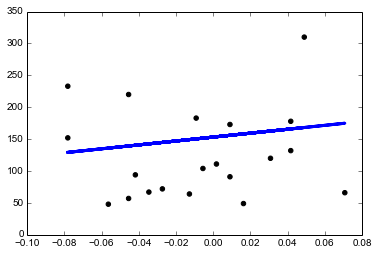

In [24]:
#Split the data into training/testing sets
X_train = Xt[:-20]
X_test = Xt[-20:]

#Split the targets into training/testing sets
y_train = diabetes.target[:-20]
y_test = diabetes.target[-20:]

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_predict = regr.predict(X_test)
score = regr.score(X_test, y_test)

print 'Betas (regression coefficients): \n', regr.coef_
print("Mean square error: %.2f" % np.mean((y_predict - y_test) ** 2))
print('Variance score: %.2f' % score)

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predict, color='blue', linewidth=3)


In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

diabetes = datasets.load_diabetes()
X = diabetes.data

#Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

#Split the targets into training/testing sets
y_train = diabetes.target[:-20]
y_test = diabetes.target[-20:]

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_predict = regr.predict(X_test)
score = regr.score(X_test, y_test)

print('Coefficients: \n', regr.coef_)
print("Mean square error: %.2f"% np.mean((y_predict - y_test) ** 2))
print('Variance score: %.2f' % score)


('Coefficients: \n', array([  3.03499549e-01,  -2.37639315e+02,   5.10530605e+02,
         3.27736980e+02,  -8.14131709e+02,   4.92814588e+02,
         1.02848452e+02,   1.84606489e+02,   7.43519617e+02,
         7.60951722e+01]))
Mean square error: 2004.57
Variance score: 0.59


**Multivariate case, a PLS Regression example**

So far our regression target was unidimensional. The hardcore regression however involves multiple target vectors, also called multiple regression. One can still use linear regression techniques, with different corrections that take into account for many exceptions, one such being that the X matrix must be full rank in order for the least square optimization (the engine of linear regression) to work. There are also many other techniques, one my favorites being partial least least squares regression (PLS-R), which I choose to exemplify.

PLS is also called projection to *latent* structures, which mignt be more apropriate, since the multiple regression problem

$Y = XB + E$

, is solved by projecting the X and Y matrices into latent (hidden) lower dimensional space that is describing them. Just as with least square fitting ,it is difficult to explain how this is done, and it requires knowledge of [factor analysis](http://en.wikipedia.org/wiki/Factor_analysis). The end result is a decomposition into a product of score and loading matrices like this:

$X = T P^{\top} + E$

$Y = U Q^{\top} + F$

, from which the coeficient matrix B is estimated.

**Multivariate case, a PLS Regression example**

So far our regression target was unidimensional. The hardcore regression however involves multiple target vectors, also called multiple regression. One can still use linear regression techniques, with different corrections that take into account for many exceptions, one such being that the X matrix must be full rank in order for the least square optimization (the engine of linear regression) to work. There are also many other techniques, one my favorites being partial least least squares regression (PLS-R), which I choose to exemplify.

PLS is also called projection to *latent* structures, which mignt be more apropriate, since the multiple regression problem

$Y = XB + E$

, is solved by projecting the X and Y matrices into latent (hidden) lower dimensional space that is describing them. Just as with least square fitting ,it is difficult to explain how this is done, and it requires knowledge of [factor analysis](http://en.wikipedia.org/wiki/Factor_analysis). The end result is a decomposition into a product of score and loading matrices like this:

$X = T P^{\top} + E$

$Y = U Q^{\top} + F$

, from which the coeficient matrix B is estimated.

True B (such that: Y = XB + Err)
[[1 1 1]
 [2 2 2]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
Estimated B
[[ 1.  1.  1.]
 [ 2.  2.  2.]
 [-0.  0.  0.]
 [-0. -0. -0.]
 [-0. -0. -0.]
 [-0. -0. -0.]
 [-0. -0. -0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [-0. -0. -0.]]
R2 0.841716030032


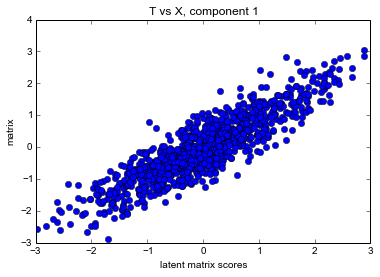

In [5]:
from  sklearn.cross_decomposition import PLSRegression

n = 1000
q = 3
p = 10
X = np.random.normal(size=n * p).reshape((n, p))
B = np.array([[1, 2] + [0] * (p - 2)] * q).T
# each Yj = 1*X1 + 2*X2 + noize
#B = np.array([[1, 0.5, 2, 4] + [0] * (p - 4)] * q).T

Y = np.dot(X, B) + np.random.normal(size=n * q).reshape((n, q)) + 5

pls2 = PLSRegression(n_components=2)
pls2.fit(X, Y)
print("True B (such that: Y = XB + Err)")
print(B)
# compare pls2.coefs with B
print("Estimated B")
print(np.round(pls2.coefs, 1))
Yp = pls2.predict(X)
from sklearn.metrics import r2_score
print "R2",r2_score(Y, Yp)

T, U = pls2.transform(X, Y) #Apply the dimension reduction learned on the training data

## Notice that the first component is usually well correlated with all the columns in X
cp = 0# 0 - first component, 1 -second component, etc
xc = 0# X matrix columns
import matplotlib.pyplot as plt
#plt.title(title)
plt.plot(T[:, cp], X[:,1], "ob")
#plt.plot(T[:, cp], X, "ob")
plt.title("T vs X, component "+str(cp+1))
plt.ylabel('matrix')
plt.xlabel('latent matrix scores')